<a href="https://colab.research.google.com/github/pavanmdr/CNN_cancer_detection/blob/main/Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/AI_practice/SkinCancerImages/Test')


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (img_height, img_width)

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                   validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(len(train_ds.class_names))
#plt.figure(figsize=(6,6))
#sns.distplot(train_ds.)
#plt.title('Count Distribution')
#plt.show()

9


In [8]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                   validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

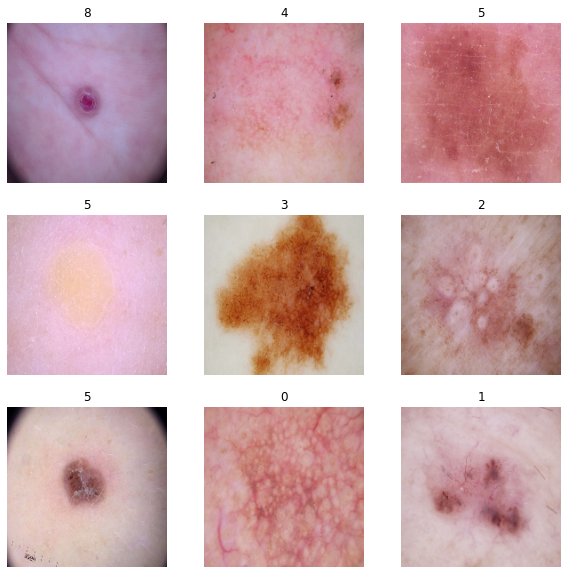

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
## model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

num_classes = 9
#y_train = tf.keras.utils.to_categorical(train_ds, num_classes)
#y_test = tf.keras.utils.to_categorical(test_ds, num_classes)

#model = Sequential()
model=Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(16, 3, activation='relu',padding='same', input_shape = (180, 180, 32)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='sparse_categorical_crossentropy',        optimizer='adam',              metrics=['accuracy'])


In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 254s 984ms/step - loss: 2.0737 - accuracy: 0.2338 - val_loss: 1.8665 - val_accuracy: 0.3020
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.7080 - accuracy: 0.3951 - val_loss: 1.5785 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5172 - accuracy: 0.4654 - val_loss: 1.4633 - val_accuracy: 0.5369
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4112 - accuracy: 0.5151 - val_loss: 1.4846 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3314 - accuracy: 0.5290 - val_loss: 1.4600 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2940 - accuracy: 0.5396 - val_loss: 1.3607 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1934 - accuracy: 0.5831 - val_loss: 1.3584 - val_accuracy: 0.5235
Epoch 8/20

### Visualizing training results

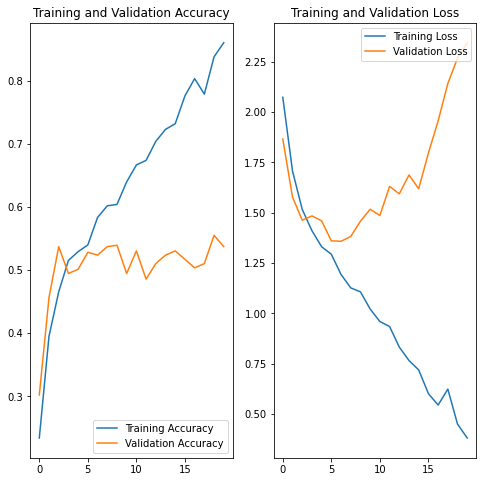

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Training accuracy is 85% but validation accuracy is 53%. There is a clear indication of over fitting

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

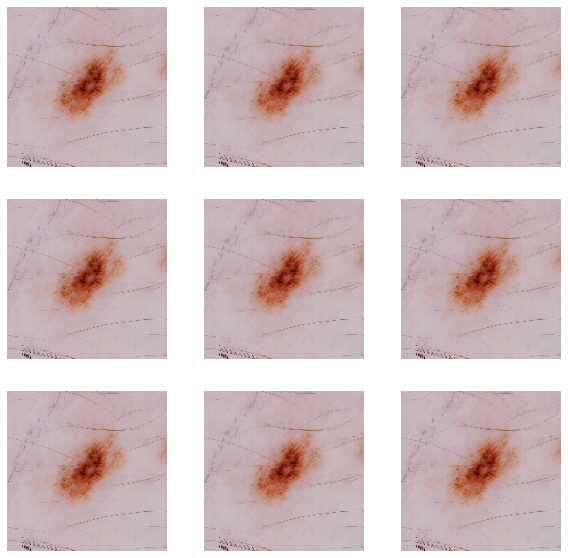

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

##  model 2 with drop outs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model_dropout=Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])


model_dropout.add(Conv2D(16, 3, activation='relu',padding='same',input_shape = (180, 180, 32)))
model_dropout.add(MaxPooling2D())

model_dropout.add(Conv2D(32, 3, activation='relu',padding='same'))
model_dropout.add(MaxPooling2D())
model_dropout.add(Conv2D(64, 3, activation='relu',padding='same'))
model_dropout.add(MaxPooling2D())
model_dropout.add(Dropout(0.25))

model_dropout.add(Flatten())
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dense(9, activation='softmax'))



### Compiling the model

In [21]:
## Your code goes here
model_dropout.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 1s 23ms/step - loss: 0.3439 - accuracy: 0.8783 - val_loss: 2.2918 - val_accuracy: 0.5145
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 0.3121 - accuracy: 0.8895 - val_loss: 2.1908 - val_accuracy: 0.5324
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 0.2930 - accuracy: 0.8884 - val_loss: 2.4616 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 0.2413 - accuracy: 0.9057 - val_loss: 2.5571 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 0.2505 - accuracy: 0.9001 - val_loss: 2.6037 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 0.2097 - accuracy: 0.9129 - val_loss: 2.4692 - val_accuracy: 0.5593
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 0.2716 - accuracy: 0.8934 - val_loss: 2.4081 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing the results

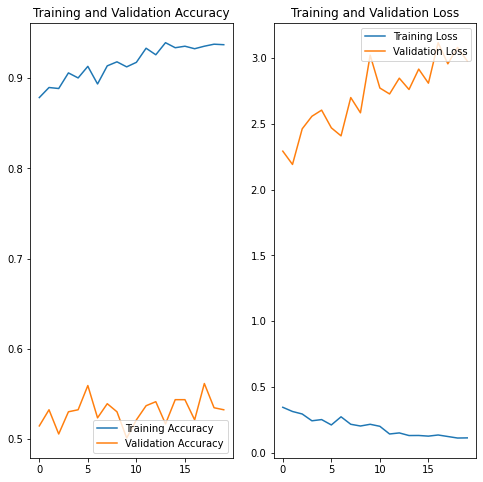

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Even after adding drop out layer, there is a clear indication of over fitting. Training accuracy is  93% where as validation accuracy is 53%. Adding drop out layer improved the training accuracy but not the validation accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

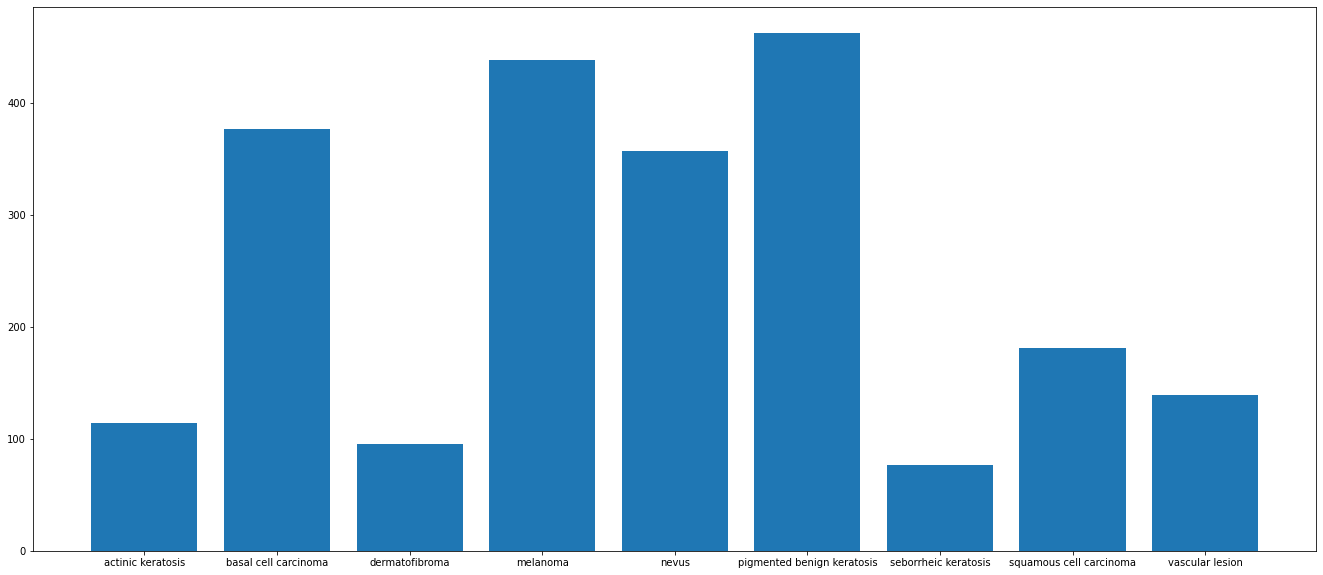

In [24]:
## Your code goes here.
#plt.bar(courses, values, color ='maroon', width = 0.4)
img_count=[]
for i in class_names:
  img_count.append(len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))
plt.figure(figsize=(23,10))
plt.bar(class_names,img_count)
 

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="/content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE0A7ECD50>: 100%|██████████| 500/500 [00:20<00:00, 24.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBE1407E110>: 100%|██████████| 500/500 [00:20<00:00, 24.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE16637110>: 100%|██████████| 500/500 [00:22<00:00, 22.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBE1432A790>: 100%|██████████| 500/500 [01:18<00:00,  6.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBE08459050>: 100%|██████████| 500/500 [01:30<00:00,  5.55 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE08443F10>: 100%|██████████| 500/500 [00:18<00:00, 26.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FBE084DE950>: 100%|██████████| 500/500 [00:45<00:00, 10.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBE140B5A50>: 100%|██████████| 500/500 [00:18<00:00, 27.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBE08540810>: 100%|██████████| 500/500 [00:17<00:00, 27.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list)

4500

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)


4500

In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
len(dataframe_dict_new.items())



4500

In [45]:
#len(path_to_training_dataset.items())
len(path_list)

6739

In [31]:
#path_list=[]
lesion_list=[]
for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df


,Path,Label
0,/content/gdrive/MyDrive/AI_practice/SkinCancer...,actinic keratosis
1,/content/gdrive/MyDrive/AI_practice/SkinCancer...,actinic keratosis
2,/content/gdrive/MyDrive/AI_practice/SkinCancer...,actinic keratosis
3,/content/gdrive/MyDrive/AI_practice/SkinCancer...,actinic keratosis
4,/content/gdrive/MyDrive/AI_practice/SkinCancer...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/AI_practice/SkinCancer...,vascular lesion
2235,/content/gdrive/MyDrive/AI_practice/SkinCancer...,vascular lesion
2236,/content/gdrive/MyDrive/AI_practice/SkinCancer...,vascular lesion
2237,/content/gdrive/MyDrive/AI_practice/SkinCancer...,vascular lesion


In [46]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)


In [47]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [53]:
data_dir_train="/content/gdrive/MyDrive/AI_practice/SkinCancerImages/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
model_drop_norm=Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])


model_drop_norm.add(Conv2D(32, (3, 3), padding='same'))
model_drop_norm.add(BatchNormalization())
model_drop_norm.add(Activation('relu'))

model_drop_norm.add(MaxPooling2D(pool_size=(2, 2)))

model_drop_norm.add(Conv2D(64, (3, 3)))
model_drop_norm.add(BatchNormalization())
model_drop_norm.add(Activation('relu'))


model_drop_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_drop_norm.add(Dropout(0.25))

model_drop_norm.add(Flatten())
model_drop_norm.add(Dense(512, activation='relu'))
model_drop_norm.add(Dense(256, activation='relu'))
model_drop_norm.add(Dropout(0.25))

model_drop_norm.add(Dense(9, activation='softmax'))


# View the summary of all layers
model_drop_norm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_11 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 88, 88, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [58]:
## Your code goes here
model_drop_norm.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [60]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 30s 173ms/step - loss: 0.6898 - accuracy: 0.7728 - val_loss: 0.6930 - val_accuracy: 0.7595
Epoch 2/30
169/169 [==============================] - 29s 168ms/step - loss: 0.4225 - accuracy: 0.8457 - val_loss: 0.6312 - val_accuracy: 0.7892
Epoch 3/30
169/169 [==============================] - 30s 171ms/step - loss: 0.2928 - accuracy: 0.8908 - val_loss: 0.5384 - val_accuracy: 0.8241
Epoch 4/30
169/169 [==============================] - 29s 167ms/step - loss: 0.2294 - accuracy: 0.9128 - val_loss: 0.5833 - val_accuracy: 0.8493
Epoch 5/30
169/169 [==============================] - 29s 165ms/step - loss: 0.1751 - accuracy: 0.9338 - val_loss: 0.5050 - val_accuracy: 0.8552
Epoch 6/30
169/169 [==============================] - 29s 169ms/step - loss: 0.1549 - accuracy: 0.9408 - val_loss: 0.5794 - val_accuracy: 0.8456
Epoch 7/30
169/169 [==============================] - 29s 165ms/step - loss: 0.1288 - accuracy: 0.9497 - val_loss: 0.5286 - val_ac

#### **Todo:**  Visualize the model results

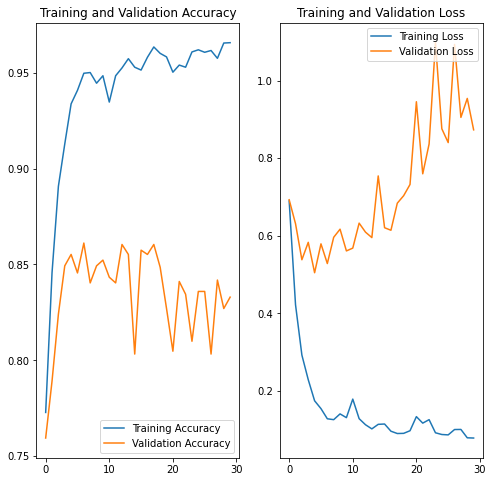

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Adding drop out layer, normalization, handling class imbalance and increasing the number of epochs has improved the performance of the model. The difference between training and validation accuracy has decreased and the model seems to perform well

